# Optimization Project : Detecting breast cancer 
During this project we will try tu predict breast cancer from patients data collected from University of Wisconsin Hospitals
We will implement some machine learning algorithms and go through some of methods and algorithms we saw in Optimization courses. The goal of this project is to solve concretes problemes with datas found on the internet by applying methods seen in class.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$
$\newcommand{\eqdef}{\equiv}$

In [2]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import math
import numpy as np
import pandas as pd
import random

## Data Set Information:

The dataset can be found here [Breast Cancer Dataset](https://www.kaggle.com/roustekbio/breast-cancer-csv)

This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.


There are 9 predictors, all quantitative, and a binary dependent variable, indicating the presence or absence of breast cancer.


## Quantitative Attributes:

* Clump Thickness 1 - 10,
* Uniformity of Cell Size 1 - 10
* Uniformity of Cell Shape 1 - 10
* Marginal Adhesion 1 - 10
* Single Epithelial Cell Size 1 - 10
* Bare Nuclei 1 - 10
* Bland Chromatin 1 - 10
* Normal Nucleoli 1 - 10
* Mitoses 1 - 10



* Distribution: Benign: 458 (65.5%) Malignant: 241 (34.5%)

## Labels:
 2 for benign, 4 for malignant


#### Loading the data and small overview

In [3]:
df = pd.read_csv('breastCancer.csv')
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Very quick cleaning 
As we can see in the dataset description there are some missing values that we need to deal with, as this number is very small we will not consider the lines with missing values, if results are not convincing we will replace this missing values by basics methods as knn on the atribute of even more easily by seeting the value to the mean.

The labels are 2 and 4 we will just set them to -1 and 1 to performe the logistic regression in a better way 

Finally as logistic regression gives a prediction by computing weights on the features it is very important to normalize the data in order to consider all features.

In [4]:
# Finding missing values and indexes 
index_missing_values = []
for i,r in df.iterrows():
    for j in range (df.shape[1]):
            if (r[j] == '?'):
                index_missing_values.append(i)
print("There are", len(index_missing_values), "missing values")

There are 16 missing values


In [5]:
# Cleaning
df = df.drop(index_missing_values)
df['class'] = df['class']-3

In [6]:
X, y = df.iloc[:,1:10] , df['class']
X = X.to_numpy()
y = y.to_numpy()
y = np.reshape(y,(683,1))
n = X.shape[0]
print("After \"cleaning\" the data we have a sample of", n,"examples")

After "cleaning" the data we have a sample of 683 examples


In [7]:
#Normalizing the datas
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

C:\Users\vince\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\vince\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Brief visulalization of the data
We will use scikit learn PCA function just to plot the points and try, if possible to have a small insight on the data

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
X_PCA = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [9]:
X_viz = pd.concat([X_PCA, df['class']], axis = 1)
X_viz.head()

,principal component 1,principal component 2,principal component 3,class
0,-1.470171,-0.104273,-0.565685,-1.0
1,1.442046,-0.570141,0.236601,-1.0
2,-1.592478,-0.076120,0.048858,-1.0
3,1.479812,-0.528452,-0.603048,-1.0
4,-1.344862,-0.090719,0.029997,-1.0


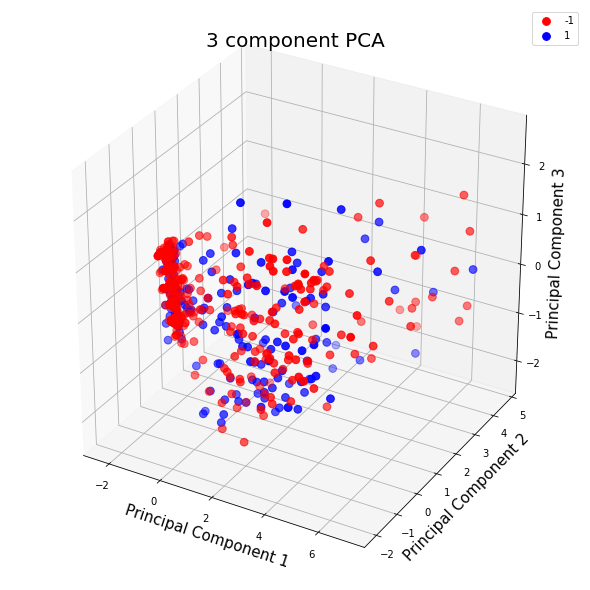

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = [-1,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = X_viz['class'] == target
    ax.scatter(X_viz.loc[indicesToKeep, 'principal component 1']
               , X_viz.loc[indicesToKeep, 'principal component 2']
               ,X_viz.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 60)
ax.legend(targets)
ax.grid()

## Solving Classification problem with logisitc regression 

Logistic classification minimize a logistic loss in place of the usual
$\ell^2$ loss for regression
  $$ \umin{w} E(w) \eqdef \frac{1}{n} \sum_{i=1}^n L(\dotp{x_i}{w},y_i)  $$
where the logistic loss reads
  $$ L( s,y ) \eqdef \log( 1+\exp(-sy) ) $$

We will now implement thoses by following what was already done in the TPs and adapt it to our problem

In order to solve the problem we need to compute the gradients of theses two functions with respect to w and we will perform a gradient descent on w
We can very easily show that 
$$  \nabla \text{E(W)} = X^T \nabla \text{L(W)}  $$
And that
$$  \nabla \text{L(W)} = - \frac{1}{n} * y  * \frac{1}{1 + e^{-X^T w y}}  $$

In [11]:
#We first define the loss fuction as written just above
def L(s,y):  
    return 1/n * sum( np.log( 1 + np.exp(-s*y) ) )
#The error function is the sum of the loss for every example
def E(w,X,y): 
    return L(X.dot(w),y);

In [12]:
#To simplify notations we define the theta fuctions 
def theta(v): 
    return 1 / (1+np.exp(-v))
#This is the gradient of the loss 
def nablaL(s,y): 
    return - 1/n * y * theta(-s * y)
#This is the gradient of the error
def nablaE(w,X,y): 
    return X.transpose().dot( nablaL(X.dot(w),y) )

In [13]:
#As we know in linear regression and logistic regression we always have an intercept 
def AddBias(X): 
    return np.hstack((X, np.ones((np.size(X,0),1))))

## First results :
We will first do the basic logistic regression and see our results then we will try to add regularization, to play on hyperparameters, to change the learning rate...

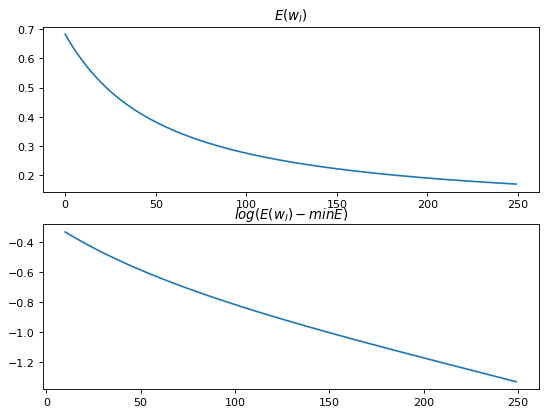

In [14]:
niter = 500
Elist = np.zeros([niter,1])
w = np.zeros( (10,1) ) # initialization
tau = 0.01
for i in np.arange(0,niter):
    w = w - tau * nablaE(w,AddBias(X),y)
    Elist[i] = E(w,AddBias(X),y)
ndisp = int(niter/2)

## display ##
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf
plt.subplot(2,1,1)
plt.plot(np.arange(0,ndisp), Elist[0:ndisp])
plt.axis('tight')
plt.title('$E(w_l)$')
plt.subplot(2,1,2);
plt.plot(np.arange(10,ndisp), np.log10(Elist[10:ndisp]-np.min(Elist))  )
plt.axis('tight')
plt.title('$log(E(w_l) - min E)$');

We can see with this graphs that the error decrease very fast and converges in a small number of iterations, we are going to test our model and see what is the accuracy

In [15]:
y_pred = np.sign(np.dot(AddBias(X),w))

In [16]:
good_class = sum(y == y_pred)
bad_class = sum(y != y_pred)
accuracy_all = good_class/(good_class+bad_class)

In [17]:
print("We have well classified",good_class[0],"examples and misclassified",bad_class[0],"examples, The accuracy is",accuracy_all[0])

We have well classified 663 examples and misclassified 20 examples, The accuracy is 0.9707174231332357


# Splitting Dataset

We can see that we have a really good accuracy and we predict the good label almost every time, this shows that the features explain very well the labels and it is easy to learn a good classifier on theses data. 
A more rigorous way to proceed is what we almost do everytime in machine learning is to split the dataset in two sets, the learning one and the test one. We will be able to compute accuracy on examples that the model have never seen before

In [18]:
#We randomly split the data with proportion 80%-20&
randsplit = np.random.rand(len(df)) < 0.8
train = df[randsplit]
test = df[~randsplit]

In [19]:
print("We have", train.shape[0], "training points")
print("We have", test.shape[0], "testing points")

We have 547 training points
We have 136 testing points


We do exaclty the same process as before but in this case we will perform our gradient descent on the training set and predict on the testing set

In [20]:
X_train, X_test = train.iloc[:,1:10] , test.iloc[:,1:10] 
y_train, y_test = train['class'], test['class']
X_train, X_test = X_train.to_numpy(), X_test.to_numpy()
y_train, y_test = y_train.to_numpy(), y_test.to_numpy()
y_train, y_test = np.reshape(y_train,(y_train.shape[0],1)), np.reshape(y_test,(y_test.shape[0],1))

In [21]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

C:\Users\vince\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\vince\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\vince\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\vince\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Before we were doing a logistic regression over all the data so there was no need to normalize, here to have the good error, as it is a sum over all the example we have to normalize it by the number of examples

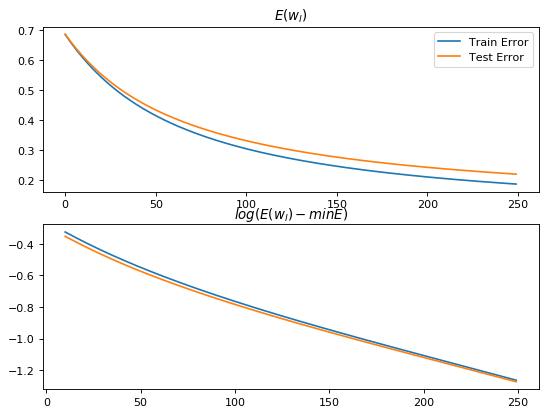

In [22]:
niter = 500
Elist_train = np.zeros([niter,1])
Elist_test = np.zeros([niter,1])
w = np.zeros( (10,1) ) # initialization
for i in np.arange(0,niter):
    w = w - tau * nablaE(w,AddBias(X_train),y_train)
    Elist_train[i] = n*E(w,AddBias(X_train),y_train)/y_train.shape[0]
    Elist_test[i] = n*E(w,AddBias(X_test),y_test)/y_test.shape[0]

ndisp = int(niter/2)

## display ##
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf
plt.subplot(2,1,1)
plt.plot(np.arange(0,ndisp), Elist_train[0:ndisp], label = "Train Error")
plt.plot(np.arange(0,ndisp), Elist_test[0:ndisp], label= "Test Error")
plt.axis('tight')
plt.title('$E(w_l)$')
plt.legend()
plt.subplot(2,1,2);
plt.plot(np.arange(10,ndisp), np.log10(Elist_train[10:ndisp]-np.min(Elist_train)) , label = "Train ")
plt.plot(np.arange(10,ndisp), np.log10(Elist_test[10:ndisp]-np.min(Elist_test)), label = "Test"   )

plt.axis('tight')
plt.title('$log(E(w_l) - min E)$');

In [23]:
y_pred = np.sign(np.dot(AddBias(X_test),w))
good_class = sum(y_test == y_pred)
bad_class = sum(y_test != y_pred)
accuracy_all = good_class/(good_class+bad_class)

In [24]:
print("We have well classified",good_class[0],"examples and misclassified",bad_class[0],"examples, The accuracy is",accuracy_all[0])

We have well classified 130 examples and misclassified 6 examples, The accuracy is 0.9558823529411765


# Huge impact of initialization
The goal of this project is not really to predict a breast cancer or even to have a good model, what we want to see through this project is how the hyperparameters influence the model and how grows the accuracy trhough iterations, we want to see what happens when we play with all the tools we have and measure the impacts on the final results.

 # Playing on parameters and see what happens

If we initialize our weights vector at 0 we have a very good classifier with more that 97% of accuracy which is really high. As the method is already very performant it will be hard to try to improve it but the goal of this part is, now that we know we have a good classifier that works, to know what happens if we put some regularization, and how the model behaves when we increase or decrease this parameter, we will also see how the accuracy grows with the number of iterations, we will also see if it is possible to find a learning rate that makes the model converges even faster and we will (knowing that it will not increase the model performance) (even more lower it) implement a stochastic gradient descent to see what happens.

To perform all this tests we are going to initialize our weight vector with random weight. With this initialization we can see a lot more interessing things in particular the convergence through iterations.

In [25]:
w_rand = np.reshape(np.random.normal(0,1,10),(10,1)) # We want to take the same initialization for every test

In [33]:
w_rand_fix = np.array([[-2.89827865],
       [ 1.04363691],
       [-2.66116871],
       [ 1.09063849],
       [ 0.02916105],
       [ 0.25002473],
       [ 1.12926141],
       [-0.33144099],
       [-0.50277302],
       [-2.52569586]])
#We wet here a fix w we are going to take for all tests in order to have coherent comparisons, 
#this one was randomly drawn for a N(0,1) 

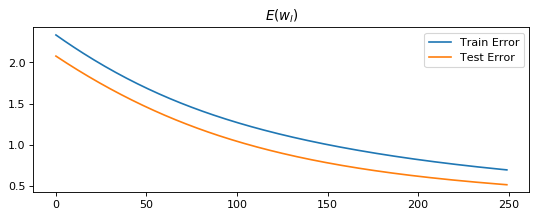

In [34]:
niter = 500
Elist_train = np.zeros([niter,1])
Elist_test = np.zeros([niter,1])
w = w_rand_fix
for i in np.arange(0,niter):
    w = w - tau * nablaE(w,AddBias(X_train),y_train)
    Elist_train[i] = n*E(w,AddBias(X_train),y_train)/y_train.shape[0]
    Elist_test[i] = n*E(w,AddBias(X_test),y_test)/y_test.shape[0]

ndisp = int(niter/2)

## display ##
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf
plt.subplot(2,1,1)
plt.plot(np.arange(0,ndisp), Elist_train[0:ndisp], label = "Train Error")
plt.plot(np.arange(0,ndisp), Elist_test[0:ndisp], label= "Test Error")
plt.axis('tight')
plt.title('$E(w_l)$')
plt.legend()


With this initialization we have the same shapes for the error curves but the values of the accuracy through iterations is much more intersting. Let's see how the accuracy grows with iterations.

## Lowering interations 

Here we want to see how does the gradient descent behaves through iterations, we will look for each iteration in a range 1 to 1000 what is the accuracy of the classifier if we take the w at this time of the algorithm, we will be carefull to take the same initialization for each test

Text(0.5, 1.0, 'Accuracy depending on iterations $')

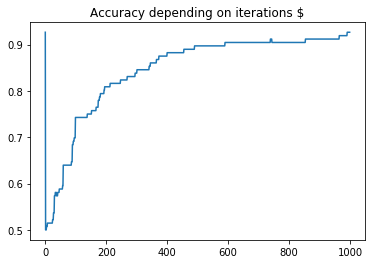

In [35]:
w_hist = []
w = w_rand_fix
def process_GD(X,y,niter,w) :
    tau = 0.01
    for i in np.arange(0,niter):
        w = w - tau * nablaE(w,AddBias(X),y)
        #print(w)
        w_hist.append(w)
    return (w_hist,E(w,AddBias(X),y))

acc  = []
w_hist,err = process_GD(X_train,y_train,1000,w)
for i in range (1000):
    y_pred = np.sign(np.dot(AddBias(X_test),w_hist[i-1]))
    acc.append( sum(y_test == y_pred)/y_test.shape[0])
#print(acc)
plt.plot(np.arange(0,1000), acc)
plt.title('Accuracy depending on iterations $')


As the initalisation is random we never get the same results, we have convergence everytime but the index from which we can consider we have converged can move. We just wanted to see on this part that de gradient descent is performing well and that we have a increasing accuracy on the test set that always converges to almost 97%. The goal is now to play on the learning rate to have a faster convergence 

## Playing on Learning Rate :
The objective of this part is just to see how the learning rate $\tau$ infuence the convergence and what happens if it is too big

In [36]:
tau_grid = [0.001,0.01,0.1,1]
w_hist = []
def process_GD_tau(X,y,niter,w,tau) :
    Elist_test = np.zeros([niter,1])
    for i in np.arange(0,niter):
        w = w - tau * nablaE(w,AddBias(X),y)
        w_hist.append(w)
        Elist_test[i] = n*E(w,AddBias(X),y)/y.shape[0]
    return (w_hist,Elist_test)

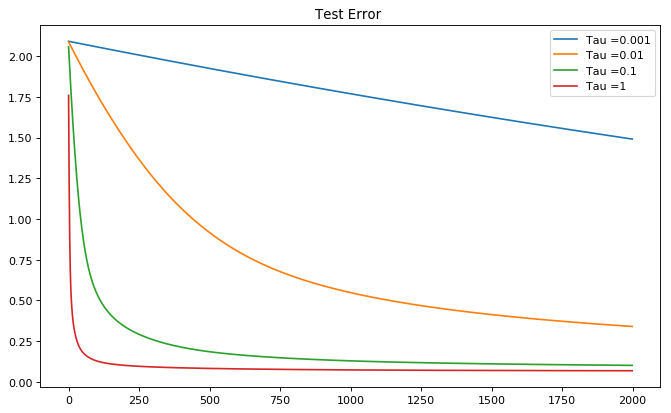

In [37]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

E_tau = []
for t in tau_grid :
    #E_tau.append(process_GD_tau(X_test,y_test,1000,w_fix,t)[1])
    plt.plot(np.arange(0,2000), process_GD_tau(X_test,y_test,2000,w_rand_fix,t)[1], label= 'Tau ={}'.format(t))
plt.title('Test Error ')
plt.legend()
plt.show()

## Regularization

Now we define the new error with regularization
  $$ \umin{w} E(w) \eqdef \frac{1}{n} \sum_{i=1}^n L(\dotp{x_i}{w},y_i) +\frac{\la}{2} ||w||^2 $$
where the logistic loss reamains the same
  $$ L( s,y ) \eqdef \log( 1+\exp(-sy) ) $$

Exactly with the same method as in logistic regression without regularization we can easliy computes the gradients and we now have
We can very easily show that 
$$  \nabla \text{E(W)} = X^T \nabla {L(w)} + \la w$$
As for the loss the gradient remains the same
$$  \nabla \text{L(W)} = - \frac{1}{n} * y  * \frac{1}{1 + e^{-X^T w y}}  $$

### Ridge Regression

In [38]:
def E_regularized(w,X,y,l):
    return L(X.dot(w),y) + (1/2)*l*np.linalg.norm(w);

In [39]:
def nablaE_regularized(w,X,y,l): 
    return X.transpose().dot( nablaL(X.dot(w),y) ) + l*w

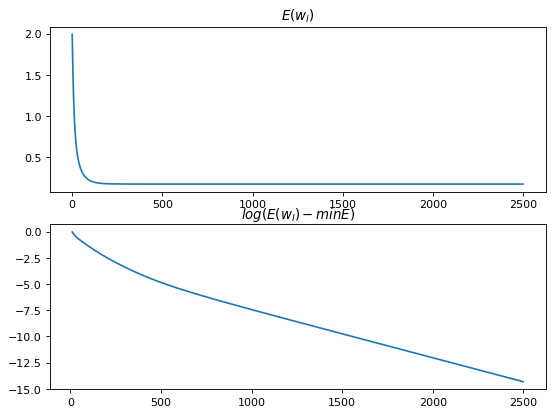

In [40]:
niter = 5000
Elist = np.zeros([niter,1])
#w = np.zeros( (10,1) ) # initialization
w = w_rand_fix
for i in np.arange(0,niter):
    tau = 0.1
    w = w - tau * nablaE_regularized(w,AddBias(X_train),y_train,0.1)
    Elist[i] = E_regularized(w,AddBias(X_train),y_train,0.1)
ndisp = int(niter/2)
## display ##
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf
plt.subplot(2,1,1)
plt.plot(np.arange(0,ndisp), Elist[0:ndisp])
plt.axis('tight')
plt.title('$E(w_l)$')
plt.subplot(2,1,2);
plt.plot(np.arange(10,ndisp), np.log10(Elist[10:ndisp]-np.min(Elist))  )
plt.axis('tight')
plt.title('$log(E(w_l) - min E)$');

We see that for $\la = 0.1$ we have also a very fast convergence of the error which is good to notice but we will know focus on what happens if we change the value of this parameter

In [41]:
grid_lambda = [0,0.1,0.2,0.3,0.5,1,1.5,2]

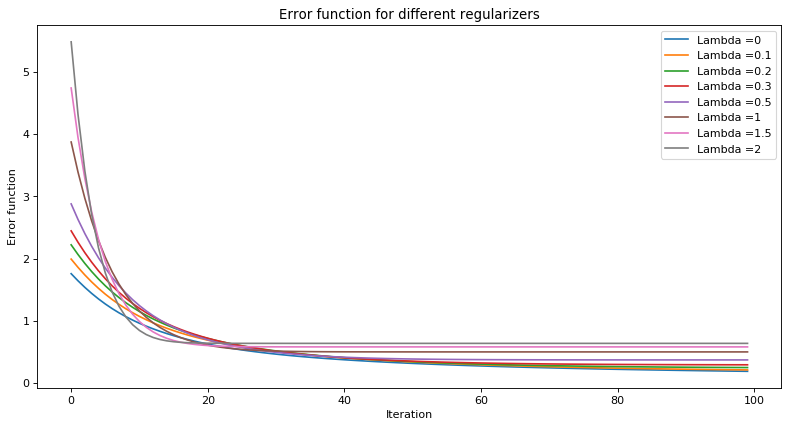

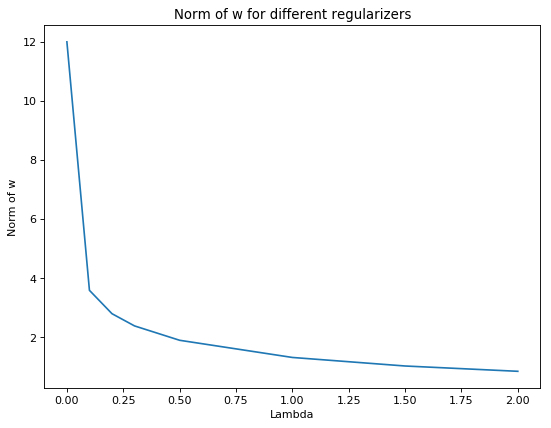

In [42]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
w_hist_norm = []
for x in grid_lambda:
    w = w_rand_fix
    niter = 200
    Elist = np.zeros([niter,1])
    for i in np.arange(0,niter):
        w = w - tau * nablaE_regularized(w,AddBias(X_train),y_train,x)
        Elist[i] = E_regularized(w,AddBias(X_train),y_train,x)
    ndisp = int(niter/2)
    w_hist_norm.append((np.sum(abs(w))))
    ## display ##
    plt.plot(np.arange(0,ndisp), Elist[0:ndisp], label = 'Lambda ={}'.format(x))
plt.ylabel('Error function')
plt.xlabel('Iteration')
plt.title("Error function for different regularizers")
plt.legend()
plt.show()

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('Norm of w')
plt.xlabel('Lambda')
plt.title("Norm of w for different regularizers")
plt.plot(grid_lambda,w_hist_norm)
plt.show()

What is really interesting here is that for very few iterations we see that for some $\la$ we have an error lower than when $\la =0$ but then when we go to a higher number of iterations we see that the error is increasing with respect to $\la$

As we already know, regularization add constraint to make sure we do not overfit the training data, here we already had realy good results without regularization and as we could suppose it, the results with regularization are less good than those without. 
We can se that the error grows with the regularization parameter. One thing nice to notice is that we really see the impact of the regularizator on the norm of $w$ indeed we penalize its complexity and as $\la$ gets bigger, the norm of $w$ gets smaller

We see that the error seems to be lower for small values of $\la $ we will see just below that if we take big values for $\la$ the error exploses and the logistic regression doesn't have sens anymore

### Just for fun

In [43]:
grid_big =[10,20,25]

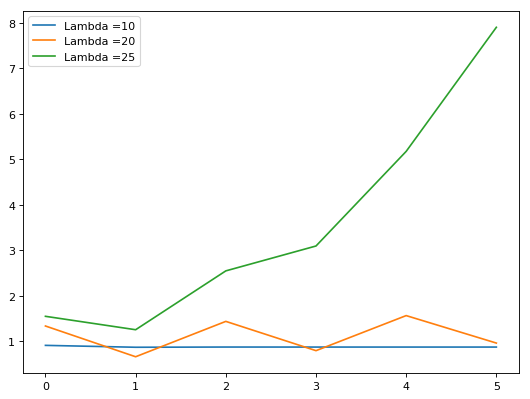

Error for lambda = 25 [[  1.55115683]
 [  1.2563067 ]
 [  2.54989448]
 [  3.0967088 ]
 [  5.17653145]
 [  7.90374858]
 [ 11.948527  ]
 [ 19.97035574]
 [ 28.34873848]
 [ 48.26128503]
 [ 65.86613199]
 [112.24770852]]


In [44]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
for x in grid_big:
    niter = 12
    Elist = np.zeros([niter,1])
    w = np.zeros( (10,1) ) # initialization
    #w = np.reshape(np.random.normal(0,1,10),(10,1))# initialization
    for i in np.arange(0,niter):
        w = w - tau * nablaE_regularized(w,AddBias(X_train),y_train,x)
        Elist[i] = E_regularized(w,AddBias(X_train),y_train,x)
    ndisp = int(niter/2)
    ## display ##
    plt.plot(np.arange(0,ndisp), Elist[0:ndisp], label = "Lambda ={}".format(x))
plt.legend()
plt.show()
print("Error for lambda = 25", Elist)

This part is not very usefull but prooves that in logistic regression taking $\la$ too big gives a very big error and the logistic regression doesn't make sens anymore

# Stochastic Gradient Descent
A very usefull algorithm that we saw in optimization course is the $\textbf{Stochastic Gradient Descent}$. Usualy we use this method when the weight we want to optimize have a huge dimension and as a result it cost a lot in term og calculus to compute de gradient. So if we want to do a gradient descent with many iterations in big dimension we can have some problems because of the important size of the gradient. For these cases we use stochastic gradient descent that choses randomly a coordinate and optimize only on this coordinate and does it as many time as we want. We saw in course that when taking the expectation of the sum of the gradients on each coordinates multiplied by the probability to choose this coordinate we get the same expectation as in classical gradient descent

We want to minimize
$$
\frac 1n \sum_{i=1}^n \ell(x_i^\top w, b_i) + \frac \lambda 2 \|w\|_2^2
$$
where
- $\ell(z, b) = \log(1 + \exp(-bz))$

We write it as a a minimization problem of the form
$$
\frac 1n \sum_{i=1}^n f_i(w)
$$
where
$$
f_i(w) = \ell(x_i^\top w, y_i) + \frac \lambda 2 \|w\|_2^2.
$$

We can easily show that the gradient of the $f_i$ is $\forall i$ 
$$
\nabla f_i(w) = - \frac{y_i}{1 + \exp(y_i x_i^\top w)} x_i + \lambda w.
$$

In [45]:
def gradSGD(X,y,w,l,i):
    return -y[i]/(1+np.exp(y[i]*np.dot(X[i],w))) + l*w  

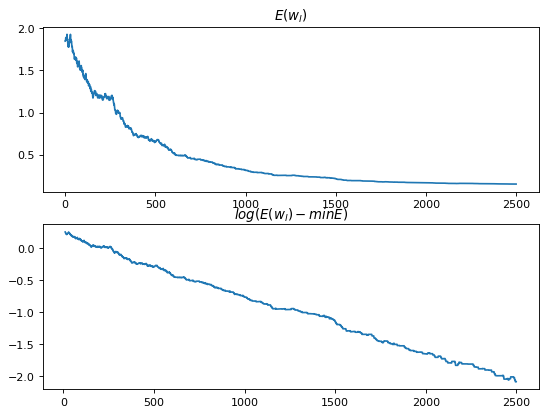

In [46]:
niter = 5000
Elist = np.zeros([niter,1])
w = w_rand_fix
for i in np.arange(0,niter):
    tau = 0.01
    index = random.randint(0,X_train.shape[0]-1)
    w = w - tau * gradSGD(AddBias(X_train),y_train,w,0,index)
    Elist[i] = E(w,AddBias(X_train),y_train)
ndisp = int(niter/2)
## display ##
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf
plt.subplot(2,1,1)
plt.plot(np.arange(0,ndisp), Elist[0:ndisp])
plt.axis('tight')
plt.title('$E(w_l)$')
plt.subplot(2,1,2);
plt.plot(np.arange(10,ndisp), np.log10(Elist[10:ndisp]-np.min(Elist))  )
plt.axis('tight')
plt.title('$log(E(w_l) - min E)$');

# Batch Gradient Descent
Now that we saw the stochastic gradient descent we are going to implement an other version of gradient descent : the $\textbf{Batch Gradient Descent}$ the idea is exactly the same as SGD but instead of choosing one coordinate we take a $\textit{Batch}$ of some coordinate, it is the good compromize between the SGD and the Classical GD. Again in this case, as Classical GD works very well we know we won't get as good results but we will still implement it to see what happens


In [47]:
def gradBGD(X,y,w,l,i):
    s = 0 
    for idx in i :
        s += -y[idx]/(1+np.exp(y[idx]*np.dot(X[idx],w))) + l*w  
    return s/(len(i)+1)

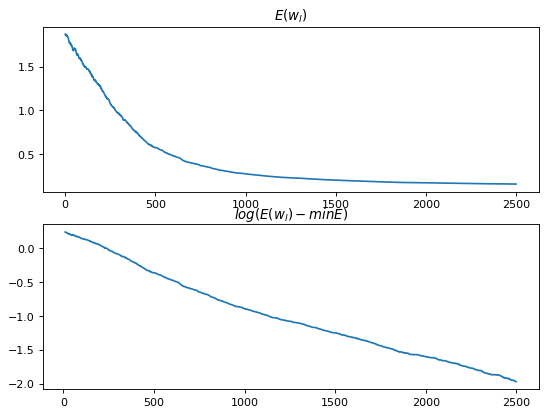

In [48]:
niter = 5000
Elist = np.zeros([niter,1])
w = w_rand_fix
for i in np.arange(0,niter):
    tau = 0.01
    index = random.sample(range(X_train.shape[0]-1), 10)
    w = w - tau * gradBGD(AddBias(X_train),y_train,w,0,index)
    Elist[i] = E(w,AddBias(X_train),y_train)
ndisp = int(niter/2)
## display ##
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf
plt.subplot(2,1,1)
plt.plot(np.arange(0,ndisp), Elist[0:ndisp])
plt.axis('tight')
plt.title('$E(w_l)$')
plt.subplot(2,1,2);
plt.plot(np.arange(10,ndisp), np.log10(Elist[10:ndisp]-np.min(Elist))  )
plt.axis('tight')
plt.title('$log(E(w_l) - min E)$');

# Comparison of Gradient Descents

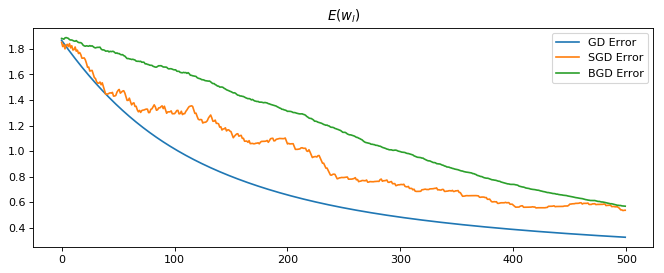

In [49]:
niter = 1000
Elist_GD = np.zeros([niter,1])
Elist_SGD = np.zeros([niter,1])
Elist_BGD = np.zeros([niter,1])
w_GD = w_rand_fix
w_SGD = w_rand_fix
w_BGD = w_rand_fix

for i in np.arange(0,niter):
    tau_GD = 0.01
    tau_sgd = 0.01
    tau_bgd = 0.01
    index_SGD = random.randint(0,X_train.shape[0]-1)
    indexes_BGD = random.sample(range(0,X_train.shape[0]-1),30)
    w_GD = w_GD - tau_GD * nablaE(w_GD,AddBias(X_train),y_train)
    Elist_GD[i] = E(w_GD,AddBias(X_train),y_train)
    w_SGD = w_SGD - tau_sgd * gradSGD(AddBias(X_train),y_train,w_SGD,0,index_SGD)
    Elist_SGD[i] = E(w_SGD,AddBias(X_train),y_train)
    w_BGD = w_BGD - tau_bgd * gradBGD(AddBias(X_train),y_train,w_BGD,0,indexes_BGD)
    Elist_BGD[i] = E(w_BGD,AddBias(X_train),y_train)
    
ndisp = int(niter/2)

## display ##
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.clf
plt.subplot(2,1,1)
plt.plot(np.arange(0,ndisp), Elist_GD[0:ndisp], label = "GD Error")
plt.plot(np.arange(0,ndisp), Elist_SGD[0:ndisp], label= "SGD Error")
plt.plot(np.arange(0,ndisp), Elist_BGD[0:ndisp], label= "BGD Error")
plt.axis('tight')
plt.title('$E(w_l)$')
plt.legend()


As we could predict it the classical gradient descent is the most efficient, then the batch and finnaly the stochastic. Like said before as the model is quite simple and we don't have a big quantity of datas we can easily compute the gradient and run a gradient descent. The goal of this part was to implement various gradient descent methods and compare them.